# 1. Download dependencies we need to explore the data for the project

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
pip install pgeocode

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


# 2. Scrape Mexican postal codes of the most important boroughs in Mexico City from https://micodigopostal.org into panda dataframes

In [3]:
url1='https://micodigopostal.org/ciudad-de-mexico/cuajimalpa-de-morelos/'
url2='https://micodigopostal.org/ciudad-de-mexico/cuauhtemoc/'
url3='https://micodigopostal.org/ciudad-de-mexico/coyoacan/'
url4='https://micodigopostal.org/ciudad-de-mexico/benito-juarez/'
url5='https://micodigopostal.org/ciudad-de-mexico/alvaro-obregon/'
url6='https://micodigopostal.org/ciudad-de-mexico/miguel-hidalgo/'
url7='https://micodigopostal.org/ciudad-de-mexico/xochimilco/'

df_cuajimalpa=pd.read_html(url1, header=0)[0]
df_cuahtemoc=pd.read_html(url2, header=0)[0]
df_coyoacan=pd.read_html(url3, header=0)[0]
df_BenitoJuarez=pd.read_html(url4, header=0)[0]
df_alvaroobregon=pd.read_html(url5, header=0)[0]
df_MiguelHidalgo=pd.read_html(url6, header=0)[0]
df_xochimilco=pd.read_html(url7, header=0)[0]

df_xochimilco.head(5)

Asentamiento▼  \
0                                                 18   
1                                          3 de Mayo   
2                                           Ahualapa   
3                                Ampliación La Noria   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                Tipo de Asentamiento  \
0                                             Barrio   
1                                             Barrio   
2                                             Barrio   
3                                            Colonia   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                       Código Postal  \
0                                              16034   
1                                              16606   
2                                              16533   
3                                              16030   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                           Municipio  \
0                                         Xochimilco   
1                                         Xochimilco   
2                                         Xochimilco   
3                                         Xochimilco   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                              Ciudad  \
0                                   Ciudad de México   
1                                   Ciudad de México   
2                                   Ciudad de México   
3                                   Ciudad de México   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                                Zona  \
0                                             Urbana   
1                                             Urbana   
2                                             Urbana   
3                                             Urbana   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                                Mapa  
0                                               Mapa  
1                                               Mapa  
2                                               Mapa  
3                                               Mapa  
4  (adsbygoogle = window.adsbygoogle || []).push(...

# 3. Removing the row #4 from all data frames that contains images from website

In [4]:
df_cuajimalpa=df_cuajimalpa.drop([4])
df_cuahtemoc=df_cuahtemoc.drop([4])
df_coyoacan=df_coyoacan.drop([4])
df_BenitoJuarez=df_BenitoJuarez.drop([4])
df_alvaroobregon=df_alvaroobregon.drop([4])
df_MiguelHidalgo=df_MiguelHidalgo.drop([4])
df_xochimilco=df_xochimilco.drop([4])

df_xochimilco 

Asentamiento▼ Tipo de Asentamiento Código Postal   Municipio  \
0                      18               Barrio         16034  Xochimilco   
1               3 de Mayo               Barrio         16606  Xochimilco   
2                Ahualapa               Barrio         16533  Xochimilco   
3     Ampliación La Noria              Colonia         16030  Xochimilco   
5    Ampliación Nativitas              Colonia         16459  Xochimilco   
..                    ...                  ...           ...         ...   
104                Texmic              Colonia         16340  Xochimilco   
105          Tierra Nueva              Colonia         16050  Xochimilco   
106  Valle de Santa María              Colonia         16550  Xochimilco   
107              Xaltocan               Barrio         16090  Xochimilco   
108            Xochipilli              Colonia         16430  Xochimilco   

               Ciudad    Zona  Mapa  
0    Ciudad de México  Urbana  Mapa  
1    Ciudad de México  Urbana  Mapa  
2    Ciudad de México  Urbana  Mapa  
3    Ciudad de México  Urbana  Mapa  
5    Ciudad de México  Urbana  Mapa  
..                ...     ...   ...  
104  Ciudad de México  Urbana  Mapa  
105  Ciudad de México  Urbana  Mapa  
106  Ciudad de México  Urbana  Mapa  
107  Ciudad de México  Urbana  Mapa  
108  Ciudad de México  Urbana  Mapa  

[108 rows x 7 columns]

# 4. Download pgeocode, a python library that gets GPS coordinates, region name and municipality name from postal codes

In [5]:
import pgeocode


In [6]:
cuajimalpa = df_cuajimalpa['Código Postal']
cuahtemoc = df_cuahtemoc['Código Postal']
coyoacan = df_coyoacan['Código Postal'] 
BenitoJuarez = df_BenitoJuarez['Código Postal']
alvaroobregon = df_alvaroobregon['Código Postal']
MiguelHidalgo = df_MiguelHidalgo['Código Postal']
xochimilco = df_xochimilco['Código Postal']

cuajimalpa_str = []
cuahtemoc_str = []
coyoacan_str = []
BenitoJuarez_str = []
alvaroobregon_str = []
MiguelHidalgo_str = []
xochimilco_str = []

for n in cuajimalpa:
    cuajimalpa_str.append(str(n))
    
for n in cuahtemoc:
    cuahtemoc_str.append(str(n))
    
for n in coyoacan:
    coyoacan_str.append(str(n))

for n in BenitoJuarez:
    BenitoJuarez_str.append(str(n))
    
for n in alvaroobregon:
    alvaroobregon_str.append(str(n))
    
for n in MiguelHidalgo:
    MiguelHidalgo_str.append(str(n))
    
for n in xochimilco:
    xochimilco_str.append(str(n))

nomi = pgeocode.Nominatim('MX')
nomi.query_postal_code(cuajimalpa_str)
nomi.query_postal_code(cuahtemoc_str)
nomi.query_postal_code(coyoacan_str)
nomi.query_postal_code(BenitoJuarez_str)
nomi.query_postal_code(alvaroobregon_str)
nomi.query_postal_code(MiguelHidalgo_str)
nomi.query_postal_code(xochimilco_str)

cuajimalpa_coord=nomi.query_postal_code(cuajimalpa_str)
cuauhtemoc_coord=nomi.query_postal_code(cuahtemoc_str)
coyoacan_coord=nomi.query_postal_code(coyoacan_str)
BenitoJuarez_coord=nomi.query_postal_code(BenitoJuarez_str)
alvaroobregon_coord=nomi.query_postal_code(alvaroobregon_str)
MiguelHidalgo_coord=nomi.query_postal_code(MiguelHidalgo_str)
xochimilco_coord=nomi.query_postal_code(xochimilco_str)
xochimilco_coord

postal_code country_code  \
0         16034           MX   
1         16606           MX   
2         16533           MX   
3         16030           MX   
4         16459           MX   
..          ...          ...   
103       16340           MX   
104       16050           MX   
105       16550           MX   
106       16090           MX   
107       16430           MX   

                                            place_name        state_name  \
0                                            Barrio 18  Distrito Federal   
1                                     Barrio 3 de Mayo  Distrito Federal   
2                                      Barrio Ahualapa  Distrito Federal   
3    División del Norte INFONAVIT, La Noria, Amplia...  Distrito Federal   
4                                 Ampliación Nativitas  Distrito Federal   
..                                                 ...               ...   
103                                             Texmic  Distrito Federal   
104  Tierra Nueva, Jardines del Sur, Barrio San Marcos  Distrito Federal   
105                    Valle de Santa María, Tototitla  Distrito Federal   
106  Barrio San Pedro, Caltongo, Barrio Xaltocan, T...  Distrito Federal   
107                                         Xochipilli  Distrito Federal   

     state_code county_name  county_code    community_name  community_code  \
0             9  Xochimilco           13  Ciudad de México            16.0   
1             9  Xochimilco           13  Ciudad de México            16.0   
2             9  Xochimilco           13  Ciudad de México            16.0   
3             9  Xochimilco           13  Ciudad de México            16.0   
4             9  Xochimilco           13  Ciudad de México            16.0   
..          ...         ...          ...               ...             ...   
103           9  Xochimilco           13  Ciudad de México            16.0   
104           9  Xochimilco           13  Ciudad de México            16.0   
105           9  Xochimilco           13  Ciudad de México            16.0   
106           9  Xochimilco           13  Ciudad de México            16.0   
107           9  Xochimilco           13  Ciudad de México            16.0   

     latitude  longitude  accuracy  
0     19.3341 -99.139000         1  
1     19.2431 -99.015900         1  
2     19.2370 -99.082300         1  
3     19.2732 -99.116860         4  
4     19.2436 -99.092800         1  
..        ...        ...       ...  
103   19.2783 -99.106700         1  
104   19.2453 -99.106333         3  
105   19.2370 -99.082300         1  
106   19.2456 -99.061500         4  
107   19.2493 -99.087100         4  

[108 rows x 12 columns]

# 5. Rename the column "postal code" with "Código Postal" in data frames of coordinates

In [7]:
# let's change the first column name 
# from "A" to "a" using rename() function 
cuajimalpa_coord= cuajimalpa_coord.rename(columns = {"postal_code":"Código Postal"}) 
cuauhtemoc_coord= cuauhtemoc_coord.rename(columns = {"postal_code":"Código Postal"}) 
coyoacan_coord= coyoacan_coord.rename(columns = {"postal_code":"Código Postal"}) 
BenitoJuarez_coord= BenitoJuarez_coord.rename(columns = {"postal_code":"Código Postal"}) 
alvaroobregon_coord= alvaroobregon_coord.rename(columns = {"postal_code":"Código Postal"}) 
MiguelHidalgo_coord= MiguelHidalgo_coord.rename(columns = {"postal_code":"Código Postal"}) 
xochimilco_coord= xochimilco_coord.rename(columns = {"postal_code":"Código Postal"}) 


# 6. Creation of new dataframe of boroughs in Mexico city with coordinates  and postal codes by merging the tables above.

In [8]:
Cuajimalpa=df_cuajimalpa.merge(cuajimalpa_coord,left_on='Código Postal',right_on='Código Postal')
Cuauhtemoc=df_cuahtemoc.merge(cuauhtemoc_coord,left_on='Código Postal',right_on='Código Postal')
Coyoacan=df_coyoacan.merge(coyoacan_coord,left_on='Código Postal',right_on='Código Postal')
BenitoJuarez=df_BenitoJuarez.merge(BenitoJuarez_coord,left_on='Código Postal',right_on='Código Postal')
AlvaroObregon=df_alvaroobregon.merge(alvaroobregon_coord,left_on='Código Postal',right_on='Código Postal')
MiguelHidalgo=df_MiguelHidalgo.merge(MiguelHidalgo_coord,left_on='Código Postal',right_on='Código Postal')
Xochimilco=df_xochimilco.merge(xochimilco_coord,left_on='Código Postal',right_on='Código Postal')
Cuajimalpa

Asentamiento▼ Tipo de Asentamiento Código Postal  \
0             1° de Mayo              Colonia         05410   
1             1° de Mayo              Colonia         05410   
2   San Lorenzo Acopilco               Pueblo         05410   
3   San Lorenzo Acopilco               Pueblo         05410   
4     Abdías García Soto              Colonia         05530   
..                   ...                  ...           ...   
56   Santa Fe Cuajimalpa              Colonia         05348   
57    Santa Rosa Xochiac               Pueblo         05610   
58             Tepetongo              Colonia         05220   
59                 Xalpa              Colonia         05730   
60            Zentlapatl              Colonia         05010   

                Municipio            Ciudad    Zona  Mapa country_code  \
0   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
1   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
2   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
3   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
4   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
..                    ...               ...     ...   ...          ...   
56  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
57  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
58  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
59  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
60  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   

                          place_name        state_name  state_code  \
0   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
1   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
2   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
3   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
4                 Abdías García Soto  Distrito Federal           9   
..                               ...               ...         ...   
56               Santa Fe Cuajimalpa  Distrito Federal           9   
57                Santa Rosa Xochiac  Distrito Federal           9   
58                         Tepetongo  Distrito Federal           9   
59                             Xalpa  Distrito Federal           9   
60                        Zentlapatl  Distrito Federal           9   

              county_name  county_code    community_name  community_code  \
0   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
1   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
2   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
3   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
4   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
..                    ...          ...               ...             ...   
56  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
57  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
58  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
59  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
60  Cuajimalpa de Morelos            4  Ciudad de México             5.0   

    latitude  longitude  accuracy  
0    19.3300   -99.3272         3  
1    19.3300   -99.3272         3  
2    19.3300   -99.3272         3  
3    19.3300   -99.3272         3  
4    19.3518   -99.2928         4  
..       ...        ...       ...  
56   19.3571   -99.2868         1  
57   19.3275   -99.2935         4  
58   19.3718   -99.2918         4  
59   19.3113   -99.3300         4  
60   19.3482   -99.3103         4  

[61 rows x 18 columns]

# 7. Data cleaning: removing unnecesary columns

In [9]:

Cuajimalpa = Cuajimalpa.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Cuauhtemoc = Cuauhtemoc.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Coyoacan = Coyoacan.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
BenitoJuarez = BenitoJuarez.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
AlvaroObregon = AlvaroObregon.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
MiguelHidalgo = MiguelHidalgo.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Xochimilco = Xochimilco.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])



In [10]:
Cuajimalpa= Cuajimalpa.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Cuauhtemoc = Cuauhtemoc.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Coyoacan = Coyoacan.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
BenitoJuarez = BenitoJuarez.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
AlvaroObregon = AlvaroObregon.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
MiguelHidalgo = MiguelHidalgo.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Xochimilco = Xochimilco.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 

Cuauhtemoc

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4364   -99.1553
7        06010  Cuauhtémoc             Centro (Área 2)   19.4364   -99.1553
8        06020  Cuauhtémoc             Centro (Área 3)   19.4364   -99.1553
9        06040  Cuauhtémoc             Centro (Área 4)   19.4364   -99.1553
10       06050  Cuauhtémoc             Centro (Área 5)   19.4364   -99.1553
11       06060  Cuauhtémoc             Centro (Área 6)   19.4364   -99.1553
12       06070  Cuauhtémoc             Centro (Área 7)   19.4364   -99.1553
13       06080  Cuauhtémoc             Centro (Área 8)   19.4364   -99.1553
14       06090  Cuauhtémoc             Centro (Área 9)   19.4364   -99.1553
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

# 8. Create a single data frame containing the relevant information of the most important boroughs in Mexico City

In [11]:
MexicoCity = pd.concat([AlvaroObregon, BenitoJuarez, Coyoacan, Cuajimalpa, Cuauhtemoc, MiguelHidalgo, Xochimilco])

MexicoCity

Postal Code         Borough  \
0         01299  Álvaro Obregón   
1         01299  Álvaro Obregón   
2         01299  Álvaro Obregón   
3         01299  Álvaro Obregón   
4         01269  Álvaro Obregón   
..          ...             ...   
215       16450      Xochimilco   
216       16200      Xochimilco   
217       16340      Xochimilco   
218       16550      Xochimilco   
219       16430      Xochimilco   

                                          Neighborhood  Latitude  Longitude  
0    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
1    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
2    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
3    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
4                 1a Sección Cañada, 2a Sección Cañada   19.3819   -99.2290  
..                                                 ...       ...        ...  
215                              Santa María Nativitas   19.2436   -99.0928  
216                            Santiago Tepalcatlalpan   19.2533   -99.1115  
217                                             Texmic   19.2783   -99.1067  
218                    Valle de Santa María, Tototitla   19.2370   -99.0823  
219                                         Xochipilli   19.2493   -99.0871  

[1356 rows x 5 columns]

# 9. Download all the dependencies that are missing to complete the project¶

In [12]:
import numpy as np # library to handle data in a vectorized manner
!pip install geopy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip -q install folium 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.


# 10. Use geopy library to get the coordinates of Mexico City

In [13]:
address = 'Mexico City, MX'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


# 11.Create a map of Mexico City with neighborhoods superimposed on top.

In [14]:
# create map of Mexico City using latitude and longitude values
map_MexicoCity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(MexicoCity['Latitude'], MexicoCity['Longitude'], MexicoCity['Borough'], MexicoCity['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MexicoCity)  
    
map_MexicoCity

# 12. Segmenting and clustering only the neighborhoods in the borough "Cuauhtémoc", which is the most visited borough in Mexico city and the historic and cultural center of Mexico city. 

In [15]:
Cuauhtemoc_data = MexicoCity[MexicoCity['Borough'] == 'Cuauhtémoc'].reset_index(drop=True)
Cuauhtemoc_data

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4364   -99.1553
7        06010  Cuauhtémoc             Centro (Área 2)   19.4364   -99.1553
8        06020  Cuauhtémoc             Centro (Área 3)   19.4364   -99.1553
9        06040  Cuauhtémoc             Centro (Área 4)   19.4364   -99.1553
10       06050  Cuauhtémoc             Centro (Área 5)   19.4364   -99.1553
11       06060  Cuauhtémoc             Centro (Área 6)   19.4364   -99.1553
12       06070  Cuauhtémoc             Centro (Área 7)   19.4364   -99.1553
13       06080  Cuauhtémoc             Centro (Área 8)   19.4364   -99.1553
14       06090  Cuauhtémoc             Centro (Área 9)   19.4364   -99.1553
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

# 12.1 Getting the geographical coordinates of Cuauhtémoc

In [16]:
address = 'Cuauhtémoc, MX'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Cuauhtemoc are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Cuauhtemoc are 19.4416128, -99.1518637.


# 12.2 Create map of  borough Cuauhtémoc using latitude and longitude values

In [17]:
map_Cuauhtemoc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(Cuauhtemoc_data['Latitude'], Cuauhtemoc_data['Longitude'], Cuauhtemoc_data['Borough'], Cuauhtemoc_data['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cuauhtemoc)  
    
map_Cuauhtemoc

## 12.3 The neighboors in the centro area were not located in the map. This is because the coordinates area were not found by the pgeocode library. The right coordinates were found using google and allocated in the Cuauhtemoc_data frame, replacing the wrong coordinates.

In [18]:
Cuauhtemoc_data.loc[6,['Latitude','Longitude']] = [19.4303,- 99.1373]
Cuauhtemoc_data.loc[7,['Latitude','Longitude']] = [19.4303,- 99.1374]
Cuauhtemoc_data.loc[8,['Latitude','Longitude']] = [19.4396,- 99.1322]
Cuauhtemoc_data.loc[9,['Latitude','Longitude']] = [19.4270,- 99.1520]
Cuauhtemoc_data.loc[10,['Latitude','Longitude']] = [19.4336,- 99.1435]
Cuauhtemoc_data.loc[11,['Latitude','Longitude']] = [19.4349,- 99.1314]
Cuauhtemoc_data.loc[12,['Latitude','Longitude']] = [19.4296,- 99.1458]
Cuauhtemoc_data.loc[13,['Latitude','Longitude']] = [19.4243,- 99.1368]
Cuauhtemoc_data.loc[14,['Latitude','Longitude']] = [19.4270,- 99.1325]

Cuauhtemoc_data

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373
7        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374
8        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322
9        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520
10       06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435
11       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314
12       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458
13       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368
14       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

In [19]:
map_Cuauhtemoc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(Cuauhtemoc_data['Latitude'], Cuauhtemoc_data['Longitude'], Cuauhtemoc_data['Borough'], Cuauhtemoc_data['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cuauhtemoc)  
    
map_Cuauhtemoc

# 13. Use Foursquare API to explore the neighborhoods and segment them

In [20]:
CLIENT_ID = '3133U4IBADF2PW5VYG1VXBAAVHABZADWS4SLGMYKPZ0EUIA3' # your Foursquare ID
CLIENT_SECRET = 'TMUZ5VI5FMK5NYH41Z5V3HKSTXQFTEI0UQLBPNLXZROKJH0K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3133U4IBADF2PW5VYG1VXBAAVHABZADWS4SLGMYKPZ0EUIA3
CLIENT_SECRET:TMUZ5VI5FMK5NYH41Z5V3HKSTXQFTEI0UQLBPNLXZROKJH0K


# 14. Explore the neigboorhoods in Cuauhtemoc¶
## function to explore the neighborhoods in Cuauhtemoc

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# type your answer here
Cuauhtemoc_venues = getNearbyVenues(names=Cuauhtemoc_data['Neighborhood'],
                                   latitudes=Cuauhtemoc_data['Latitude'],
                                   longitudes=Cuauhtemoc_data['Longitude']
                                  )

Algarin
Ampliación Asturias
Asturias
Atlampa
Buenavista
Buenos Aires
Centro (Área 1)
Centro (Área 2)
Centro (Área 3)
Centro (Área 4)
Centro (Área 5)
Centro (Área 6)
Centro (Área 7)
Centro (Área 8)
Centro (Área 9)
Condesa
Cuauhtémoc
Doctores
Esperanza
Ex-Hipódromo de Peralvillo
Felipe Pescador
Guerrero
Hipódromo
Hipódromo Condesa
Juárez
Maza
Plan Tepito, Morelos
Nonoalco Tlatelolco
Obrera
Paulino Navarro
Peralvillo
Roma Norte
Roma Sur
San Rafael
San Simón Tolnáhuac
Santa María Insurgentes
Santa María la Ribera
Tabacalera
Tránsito
Valle Gómez
Vista Alegre


# 15. Let's check the size of the resulting dataframe

In [23]:
print(Cuauhtemoc_venues.shape)
Cuauhtemoc_venues.head(500)

(1999, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                Algarin                19.4053                -99.1408   
1                Algarin                19.4053                -99.1408   
2                Algarin                19.4053                -99.1408   
3                Algarin                19.4053                -99.1408   
4                Algarin                19.4053                -99.1408   
5                Algarin                19.4053                -99.1408   
6                Algarin                19.4053                -99.1408   
7                Algarin                19.4053                -99.1408   
8                Algarin                19.4053                -99.1408   
9                Algarin                19.4053                -99.1408   
10               Algarin                19.4053                -99.1408   
11               Algarin                19.4053                -99.1408   
12               Algarin                19.4053                -99.1408   
13               Algarin                19.4053                -99.1408   
14               Algarin                19.4053                -99.1408   
15               Algarin                19.4053                -99.1408   
16               Algarin                19.4053                -99.1408   
17               Algarin                19.4053                -99.1408   
18               Algarin                19.4053                -99.1408   
19               Algarin                19.4053                -99.1408   
20   Ampliación Asturias                19.4070                -99.1313   
21   Ampliación Asturias                19.4070                -99.1313   
22   Ampliación Asturias                19.4070                -99.1313   
23   Ampliación Asturias                19.4070                -99.1313   
24   Ampliación Asturias                19.4070                -99.1313   
25   Ampliación Asturias                19.4070                -99.1313   
26   Ampliación Asturias                19.4070                -99.1313   
27   Ampliación Asturias                19.4070                -99.1313   
28   Ampliación Asturias                19.4070                -99.1313   
29   Ampliación Asturias                19.4070                -99.1313   
30   Ampliación Asturias                19.4070                -99.1313   
31   Ampliación Asturias                19.4070                -99.1313   
32   Ampliación Asturias                19.4070                -99.1313   
33   Ampliación Asturias                19.4070                -99.1313   
34   Ampliación Asturias                19.4070                -99.1313   
35   Ampliación Asturias                19.4070                -99.1313   
36   Ampliación Asturias                19.4070                -99.1313   
37   Ampliación Asturias                19.4070                -99.1313   
38   Ampliación Asturias                19.4070                -99.1313   
39   Ampliación Asturias                19.4070                -99.1313   
40   Ampliación Asturias                19.4070                -99.1313   
41   Ampliación Asturias                19.4070                -99.1313   
42              Asturias                19.4039                -99.1308   
43              Asturias                19.4039                -99.1308   
44              Asturias                19.4039                -99.1308   
45              Asturias                19.4039                -99.1308   
46              Asturias                19.4039                -99.1308   
47              Asturias                19.4039                -99.1308   
48              Asturias                19.4039                -99.1308   
49              Asturias                19.4039                -99.1308   
50              Asturias                19.4039                -99.1308   
51              Asturias                19.4039                -99.1308   
52              Asturias             

In [24]:
Cuauhtemoc_venues=Cuauhtemoc_venues[Cuauhtemoc_venues["Venue Category"].str.contains("Mexican|Taco")==False]
#Cuauhtemoc_venues=Cuauhtemoc_venues[Cuauhtemoc_venues['Venue Category'].str.contains('Mexican|Taco')].reset_index(drop=False)
Cuauhtemoc_venues.index = np.arange(1, len(Cuauhtemoc_venues )+1)
Cuauhtemoc_venues

Neighborhood  Neighborhood Latitude  \
1                        Algarin                19.4053   
2                        Algarin                19.4053   
3                        Algarin                19.4053   
4                        Algarin                19.4053   
5                        Algarin                19.4053   
6                        Algarin                19.4053   
7                        Algarin                19.4053   
8                        Algarin                19.4053   
9                        Algarin                19.4053   
10                       Algarin                19.4053   
11           Ampliación Asturias                19.4070   
12           Ampliación Asturias                19.4070   
13           Ampliación Asturias                19.4070   
14           Ampliación Asturias                19.4070   
15           Ampliación Asturias                19.4070   
16           Ampliación Asturias                19.4070   
17           Ampliación Asturias                19.4070   
18           Ampliación Asturias                19.4070   
19           Ampliación Asturias                19.4070   
20           Ampliación Asturias                19.4070   
21           Ampliación Asturias                19.4070   
22           Ampliación Asturias                19.4070   
23           Ampliación Asturias                19.4070   
24           Ampliación Asturias                19.4070   
25           Ampliación Asturias                19.4070   
26           Ampliación Asturias                19.4070   
27                      Asturias                19.4039   
28                      Asturias                19.4039   
29                      Asturias                19.4039   
30                      Asturias                19.4039   
31                      Asturias                19.4039   
32                      Asturias                19.4039   
33                      Asturias                19.4039   
34                      Asturias                19.4039   
35                      Asturias                19.4039   
36                      Asturias                19.4039   
37                      Asturias                19.4039   
38                      Asturias                19.4039   
39                      Asturias                19.4039   
40                      Asturias                19.4039   
41                       Atlampa                19.4581   
42                       Atlampa                19.4581   
43                       Atlampa                19.4581   
44                       Atlampa                19.4581   
45                       Atlampa                19.4581   
46                       Atlampa                19.4581   
47                       Atlampa                19.4581   
48                       Atlampa                19.4581   
49                    Buenavista                19.4456   
50                    Buenavista                19.4456   
51                    Buenavista                19.4456   
52                    Buenavista                19.4456   
53                    Buenavista                19.4456   
54                    Buenavista                19.4456   
55                    Buenavista                19.4456   
56                    Buenavista                19.4456   
57                    Buenavista                19.4456   
58                    Buenavista                19.4456   
59                    Buenavista                19.4456   
60                    Buenavista                19.4456   
61                    Buenavista                19.4456   
62                    Buenavista                19.4456   
63                    Buenavista                19.4456   
64                    Buenavista                19.4456   
65                    Buenavista                19.4456   
66                    Buenavista                19.4456   
67                    Buenavista                19.4456   
68      

In [25]:
# Create a data frame only for Restaurants in Cuauthemoc Borough
Cuauhtemoc_venues_only_restaurant = Cuauhtemoc_venues[Cuauhtemoc_venues['Venue Category'].str.contains('Restaurant|Pizza|Taco|BBQ|Bistro|Steakhouse')].reset_index(drop=True)
Cuauhtemoc_venues_only_restaurant.index = np.arange(1, len(Cuauhtemoc_venues_only_restaurant )+1)
print (Cuauhtemoc_venues_only_restaurant['Venue Category'].value_counts())

Restaurant                         62
Seafood Restaurant                 56
Pizza Place                        27
Argentinian Restaurant             25
Tapas Restaurant                   14
Fast Food Restaurant               12
Italian Restaurant                 11
Vegetarian / Vegan Restaurant      10
Sushi Restaurant                    9
Spanish Restaurant                  9
Steakhouse                          8
Japanese Restaurant                 7
Mediterranean Restaurant            7
Bistro                              7
BBQ Joint                           6
Comfort Food Restaurant             6
Greek Restaurant                    4
German Restaurant                   4
Russian Restaurant                  4
Indian Restaurant                   3
Chinese Restaurant                  3
New American Restaurant             3
Southern / Soul Food Restaurant     2
Cuban Restaurant                    1
Ramen Restaurant                    1
Peruvian Restaurant                 1
American Res

In [26]:
Cuauhtemoc_venues_only_restaurant

Neighborhood  Neighborhood Latitude  \
1                       Algarin                19.4053   
2           Ampliación Asturias                19.4070   
3           Ampliación Asturias                19.4070   
4           Ampliación Asturias                19.4070   
5                      Asturias                19.4039   
6                      Asturias                19.4039   
7                      Asturias                19.4039   
8                      Asturias                19.4039   
9                    Buenavista                19.4456   
10                   Buenavista                19.4456   
11                   Buenavista                19.4456   
12                   Buenavista                19.4456   
13                   Buenavista                19.4456   
14                   Buenavista                19.4456   
15                 Buenos Aires                19.4054   
16                 Buenos Aires                19.4054   
17              Centro (Área 1)                19.4303   
18              Centro (Área 1)                19.4303   
19              Centro (Área 1)                19.4303   
20              Centro (Área 1)                19.4303   
21              Centro (Área 1)                19.4303   
22              Centro (Área 1)                19.4303   
23              Centro (Área 1)                19.4303   
24              Centro (Área 1)                19.4303   
25              Centro (Área 1)                19.4303   
26              Centro (Área 1)                19.4303   
27              Centro (Área 1)                19.4303   
28              Centro (Área 1)                19.4303   
29              Centro (Área 2)                19.4303   
30              Centro (Área 2)                19.4303   
31              Centro (Área 2)                19.4303   
32              Centro (Área 2)                19.4303   
33              Centro (Área 2)                19.4303   
34              Centro (Área 2)                19.4303   
35              Centro (Área 2)                19.4303   
36              Centro (Área 2)                19.4303   
37              Centro (Área 2)                19.4303   
38              Centro (Área 2)                19.4303   
39              Centro (Área 2)                19.4303   
40              Centro (Área 2)                19.4303   
41              Centro (Área 3)                19.4396   
42              Centro (Área 3)                19.4396   
43              Centro (Área 3)                19.4396   
44              Centro (Área 3)                19.4396   
45              Centro (Área 4)                19.4270   
46              Centro (Área 4)                19.4270   
47              Centro (Área 4)                19.4270   
48              Centro (Área 4)                19.4270   
49              Centro (Área 4)                19.4270   
50              Centro (Área 5)                19.4336   
51              Centro (Área 5)                19.4336   
52              Centro (Área 5)                19.4336   
53              Centro (Área 5)                19.4336   
54              Centro (Área 5)                19.4336   
55              Centro (Área 5)                19.4336   
56              Centro (Área 5)                19.4336   
57              Centro (Área 5)                19.4336   
58              Centro (Área 5)                19.4336   
59              Centro (Área 5)                19.4336   
60              Centro (Área 5)                19.4336   
61              Centro (Área 5)                19.4336   
62              Centro (Área 5)                19.4336   
63              Centro (Área 5)                19.4336   
64              Centro (Área 5)                19.4336   
65              Centro (Área 6)                19.4349   
66              Centro (Área 6)                19.4349   
67              Centro (Área 6)                19.4349   
68              Centro (Área 6)                19.4349   
69              C

In [27]:
print('There are {} unique categories.'.format(len(Cuauhtemoc_venues_only_restaurant['Venue Category'].unique())))

There are 28 unique categories.


In [28]:
# create a dataframe of top 10 categories
Cuauhtemoc_Venues_Top10 = Cuauhtemoc_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Cuauhtemoc_Venues_Top10=Cuauhtemoc_Venues_Top10.reset_index()
Cuauhtemoc_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Cuauhtemoc_Venues_Top10

Venue_Category  Frequency
0                     Restaurant         62
1             Seafood Restaurant         56
2                    Pizza Place         27
3         Argentinian Restaurant         25
4               Tapas Restaurant         14
5           Fast Food Restaurant         12
6             Italian Restaurant         11
7  Vegetarian / Vegan Restaurant         10
8               Sushi Restaurant          9
9             Spanish Restaurant          9

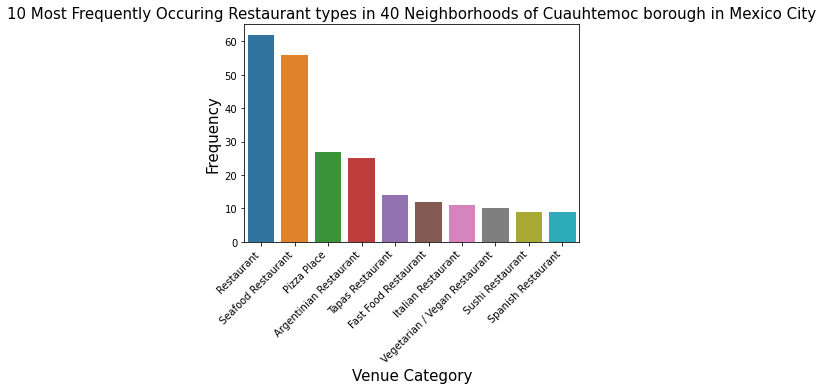

<Figure size 1296x504 with 0 Axes>

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Cuauhtemoc_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurant types in 40 Neighborhoods of Cuauhtemoc borough in Mexico City', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

# 16.Get the number of venues that were returned for each neighborhood

In [30]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Cuauhtemoc_venues_only_restaurant.shape)
Cuauhtemoc_venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (304, 7)


Neighborhood  Neighborhood Latitude  \
1                       Algarin                19.4053   
2           Ampliación Asturias                19.4070   
3           Ampliación Asturias                19.4070   
4           Ampliación Asturias                19.4070   
5                      Asturias                19.4039   
6                      Asturias                19.4039   
7                      Asturias                19.4039   
8                      Asturias                19.4039   
9                    Buenavista                19.4456   
10                   Buenavista                19.4456   
11                   Buenavista                19.4456   
12                   Buenavista                19.4456   
13                   Buenavista                19.4456   
14                   Buenavista                19.4456   
15                 Buenos Aires                19.4054   
16                 Buenos Aires                19.4054   
17              Centro (Área 1)                19.4303   
18              Centro (Área 1)                19.4303   
19              Centro (Área 1)                19.4303   
20              Centro (Área 1)                19.4303   
21              Centro (Área 1)                19.4303   
22              Centro (Área 1)                19.4303   
23              Centro (Área 1)                19.4303   
24              Centro (Área 1)                19.4303   
25              Centro (Área 1)                19.4303   
26              Centro (Área 1)                19.4303   
27              Centro (Área 1)                19.4303   
28              Centro (Área 1)                19.4303   
29              Centro (Área 2)                19.4303   
30              Centro (Área 2)                19.4303   
31              Centro (Área 2)                19.4303   
32              Centro (Área 2)                19.4303   
33              Centro (Área 2)                19.4303   
34              Centro (Área 2)                19.4303   
35              Centro (Área 2)                19.4303   
36              Centro (Área 2)                19.4303   
37              Centro (Área 2)                19.4303   
38              Centro (Área 2)                19.4303   
39              Centro (Área 2)                19.4303   
40              Centro (Área 2)                19.4303   
41              Centro (Área 3)                19.4396   
42              Centro (Área 3)                19.4396   
43              Centro (Área 3)                19.4396   
44              Centro (Área 3)                19.4396   
45              Centro (Área 4)                19.4270   
46              Centro (Área 4)                19.4270   
47              Centro (Área 4)                19.4270   
48              Centro (Área 4)                19.4270   
49              Centro (Área 4)                19.4270   
50              Centro (Área 5)                19.4336   
51              Centro (Área 5)                19.4336   
52              Centro (Área 5)                19.4336   
53              Centro (Área 5)                19.4336   
54              Centro (Área 5)                19.4336   
55              Centro (Área 5)                19.4336   
56              Centro (Área 5)                19.4336   
57              Centro (Área 5)                19.4336   
58              Centro (Área 5)                19.4336   
59              Centro (Área 5)                19.4336   
60              Centro (Área 5)                19.4336   
61              Centro (Área 5)                19.4336   
62              Centro (Área 5)                19.4336   
63              Centro (Área 5)                19.4336   
64              Centro (Área 5)                19.4336   
65              Centro (Área 6)                19.4349   
66              Centro (Área 6)                19.4349   
67              Centro (Área 6)                19.4349   
68              Centro (Área 6)                19.4349   
69              C

In [31]:
Cuauhtemoc_venues_restaurant = Cuauhtemoc_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant|Pizza|Taco|BBQ|Bistro|Steakhouse')].count())

In [32]:
Cuauhtemoc_venues_restaurant

Neighborhood
Algarin                        1
Ampliación Asturias            3
Asturias                       4
Buenavista                     6
Buenos Aires                   2
Centro (Área 1)               12
Centro (Área 2)               12
Centro (Área 3)                4
Centro (Área 4)                5
Centro (Área 5)               15
Centro (Área 6)               10
Centro (Área 7)               19
Centro (Área 8)                6
Centro (Área 9)               11
Condesa                       17
Cuauhtémoc                     6
Esperanza                      6
Ex-Hipódromo de Peralvillo     1
Felipe Pescador                4
Guerrero                       3
Hipódromo                     17
Hipódromo Condesa             17
Juárez                        17
Maza                           3
Nonoalco Tlatelolco            4
Obrera                         3
Paulino Navarro                4
Peralvillo                     4
Plan Tepito, Morelos           1
Roma Norte                    

# 17. Find how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} unique categories.'.format(len(Cuauhtemoc_venues_only_restaurant['Venue Category'].unique())))

There are 28 unique categories.


# 18. Analyze Each Neighborhood in Cuauhtemoc borough

In [34]:
# one hot encoding
Cuauhtemoc_onehot = pd.get_dummies(Cuauhtemoc_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cuauhtemoc_onehot['Neighborhood'] = Cuauhtemoc_venues_only_restaurant['Neighborhood'] 

# define a list of column names
cols = Cuauhtemoc_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
Cuauhtemoc_onehot = Cuauhtemoc_onehot.reindex(columns= cols)

#check result
Cuauhtemoc_onehot.head(500)

Neighborhood  American Restaurant  Argentinian Restaurant  \
1                       Algarin                    0                       0   
2           Ampliación Asturias                    0                       0   
3           Ampliación Asturias                    0                       1   
4           Ampliación Asturias                    0                       0   
5                      Asturias                    0                       1   
6                      Asturias                    0                       0   
7                      Asturias                    0                       0   
8                      Asturias                    0                       0   
9                    Buenavista                    0                       0   
10                   Buenavista                    0                       0   
11                   Buenavista                    0                       0   
12                   Buenavista                    1                       0   
13                   Buenavista                    0                       0   
14                   Buenavista                    0                       0   
15                 Buenos Aires                    0                       1   
16                 Buenos Aires                    0                       0   
17              Centro (Área 1)                    0                       0   
18              Centro (Área 1)                    0                       0   
19              Centro (Área 1)                    0                       0   
20              Centro (Área 1)                    0                       0   
21              Centro (Área 1)                    0                       0   
22              Centro (Área 1)                    0                       0   
23              Centro (Área 1)                    0                       0   
24              Centro (Área 1)                    0                       0   
25              Centro (Área 1)                    0                       1   
26              Centro (Área 1)                    0                       0   
27              Centro (Área 1)                    0                       0   
28              Centro (Área 1)                    0                       0   
29              Centro (Área 2)                    0                       0   
30              Centro (Área 2)                    0                       0   
31              Centro (Área 2)                    0                       0   
32              Centro (Área 2)                    0                       0   
33              Centro (Área 2)                    0                       0   
34              Centro (Área 2)                    0                       0   
35              Centro (Área 2)                    0                       0   
36              Centro (Área 2)                    0                       0   
37              Centro (Área 2)                    0                       1   
38              Centro (Área 2)                    0                       0   
39              Centro (Área 2)                    0                       0   
40              Centro (Área 2)                    0                       0   
41              Centro (Área 3)                    0                       0   
42              Centro (Área 3)                    0                       0   
43              Centro (Área 3)                    0                       0   
44              Centro (Área 3)                    0                       0   
45              Centro (Área 4)                    0                       0   
46              Centro (Área 4)                    0                       0   
47              Centro (Área 4)                    0                       1   
48              Centro (Área 4)                    0                       0   
49              Centro (Área 4)                    0                       0   
50              Cen

# 19. Get the new dataframe size.

In [35]:
Cuauhtemoc_onehot.shape

(304, 29)

# 20. Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [36]:
Cuauhtemoc_grouped = Cuauhtemoc_onehot.groupby('Neighborhood').mean().reset_index()
Cuauhtemoc_grouped

Neighborhood  American Restaurant  Argentinian Restaurant  \
0                      Algarin             0.000000                0.000000   
1          Ampliación Asturias             0.000000                0.333333   
2                     Asturias             0.000000                0.250000   
3                   Buenavista             0.166667                0.000000   
4                 Buenos Aires             0.000000                0.500000   
5              Centro (Área 1)             0.000000                0.083333   
6              Centro (Área 2)             0.000000                0.083333   
7              Centro (Área 3)             0.000000                0.000000   
8              Centro (Área 4)             0.000000                0.200000   
9              Centro (Área 5)             0.000000                0.066667   
10             Centro (Área 6)             0.000000                0.000000   
11             Centro (Área 7)             0.000000                0.105263   
12             Centro (Área 8)             0.000000                0.000000   
13             Centro (Área 9)             0.000000                0.090909   
14                     Condesa             0.000000                0.117647   
15                  Cuauhtémoc             0.000000                0.000000   
16                   Esperanza             0.000000                0.000000   
17  Ex-Hipódromo de Peralvillo             0.000000                0.000000   
18             Felipe Pescador             0.000000                0.000000   
19                    Guerrero             0.000000                0.000000   
20                   Hipódromo             0.000000                0.117647   
21           Hipódromo Condesa             0.000000                0.117647   
22                      Juárez             0.000000                0.058824   
23                        Maza             0.000000                0.000000   
24         Nonoalco Tlatelolco             0.000000                0.000000   
25                      Obrera             0.000000                0.000000   
26             Paulino Navarro             0.000000                0.250000   
27                  Peralvillo             0.000000                0.000000   
28        Plan Tepito, Morelos             0.000000                0.000000   
29                  Roma Norte             0.000000                0.000000   
30                    Roma Sur             0.000000                0.428571   
31                  San Rafael             0.000000                0.000000   
32         San Simón Tolnáhuac             0.000000                0.000000   
33       Santa María la Ribera             0.000000                0.000000   
34                  Tabacalera             0.000000                0.133333   
35                    Tránsito             0.000000                0.125000   
36                 Valle Gómez             0.000000                0.000000   
37                Vista Alegre             0.000000                0.100000   

    BBQ Joint    Bistro  Chinese Restaurant  Comfort Food Restaurant  \
0    0.000000  0.000000            0.000000                 0.000000   
1    0.000000  0.000000            0.000000                 0.000000   
2    0.250000  0.000000            0.000000                 0.000000   
3    0.000000  0.000000            0.166667                 0.000000   
4    0.000000  0.000000            0.000000                 0.000000   
5    0.083333  0.000000            0.000000                 0.000000   
6    0.083333  0.000000            0.000000                 0.000000   
7    0.000000  0.000000            0.000000                 0.000000   
8    0.000000  0.000000            0.000000                 0.000000   
9    0.000000  0.066667            0.000000                 0.066667   
10   0.000000  0.000000            0.000000                 0.000000   
11   0.000000  0.052632            0.000000                 0.105263   


# 21. Get size of the new dataframe

In [37]:
Cuauhtemoc_grouped.shape

(38, 29)

# 22. Show each neighborhood along with the top 10 most common venues

In [38]:
num_top_venues = 10

for hood in Cuauhtemoc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Cuauhtemoc_grouped[Cuauhtemoc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algarin----
                             venue  freq
0                       Steakhouse   1.0
1              American Restaurant   0.0
2           Argentinian Restaurant   0.0
3                 Tapas Restaurant   0.0
4                 Sushi Restaurant   0.0
5               Spanish Restaurant   0.0
6  Southern / Soul Food Restaurant   0.0
7               Seafood Restaurant   0.0
8               Russian Restaurant   0.0
9                       Restaurant   0.0


----Ampliación Asturias----
                             venue  freq
0    Vegetarian / Vegan Restaurant  0.33
1           Argentinian Restaurant  0.33
2                       Restaurant  0.33
3                 Tapas Restaurant  0.00
4                 Sushi Restaurant  0.00
5                       Steakhouse  0.00
6               Spanish Restaurant  0.00
7  Southern / Soul Food Restaurant  0.00
8               Seafood Restaurant  0.00
9               Russian Restaurant  0.00


----Asturias----
                             venu

# 23. Store the previous information in a pandas_ dataframe

## 23a. First, let's write a function to sort the venues in descending order.

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cuauhtemoc_grouped['Neighborhood']

for ind in np.arange(Cuauhtemoc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cuauhtemoc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(50)

Neighborhood          1st Most Common Venue  \
0                      Algarin                     Steakhouse   
1          Ampliación Asturias  Vegetarian / Vegan Restaurant   
2                     Asturias  Vegetarian / Vegan Restaurant   
3                   Buenavista           Fast Food Restaurant   
4                 Buenos Aires         Argentinian Restaurant   
5              Centro (Área 1)                     Restaurant   
6              Centro (Área 2)                     Restaurant   
7              Centro (Área 3)                     Restaurant   
8              Centro (Área 4)       Mediterranean Restaurant   
9              Centro (Área 5)                     Restaurant   
10             Centro (Área 6)                     Restaurant   
11             Centro (Área 7)  Vegetarian / Vegan Restaurant   
12             Centro (Área 8)                     Steakhouse   
13             Centro (Área 9)             Seafood Restaurant   
14                     Condesa       Mediterranean Restaurant   
15                  Cuauhtémoc             Seafood Restaurant   
16                   Esperanza             Seafood Restaurant   
17  Ex-Hipódromo de Peralvillo                    Pizza Place   
18             Felipe Pescador                     Restaurant   
19                    Guerrero             Seafood Restaurant   
20                   Hipódromo       Mediterranean Restaurant   
21           Hipódromo Condesa       Mediterranean Restaurant   
22                      Juárez                     Restaurant   
23                        Maza                     Restaurant   
24         Nonoalco Tlatelolco                    Pizza Place   
25                      Obrera             Seafood Restaurant   
26             Paulino Navarro               Sushi Restaurant   
27                  Peralvillo             Seafood Restaurant   
28        Plan Tepito, Morelos           Fast Food Restaurant   
29                  Roma Norte             Seafood Restaurant   
30                    Roma Sur         Argentinian Restaurant   
31                  San Rafael            Japanese Restaurant   
32         San Simón Tolnáhuac                     Restaurant   
33       Santa María la Ribera                     Restaurant   
34                  Tabacalera                     Restaurant   
35                    Tránsito             Seafood Restaurant   
36                 Valle Gómez           Fast Food Restaurant   
37                Vista Alegre                    Pizza Place   

            2nd Most Common Venue          3rd Most Common Venue  \
0   Vegetarian / Vegan Restaurant            Japanese Restaurant   
1          Argentinian Restaurant                     Restaurant   
2          Argentinian Restaurant                      BBQ Joint   
3             American Restaurant               Sushi Restaurant   
4                     Pizza Place  Vegetarian / Vegan Restaurant   
5              Seafood Restaurant             Spanish Restaurant   
6              Seafood Restaurant             Spanish Restaurant   
7                     Pizza Place  Vegetarian / Vegan Restaurant   
8          Argentinian Restaurant             Seafood Restaurant   
9              Seafood Restaurant  Vegetarian / Vegan Restaurant   
10             Italian Restaurant             Seafood Restaurant   
11             Seafood Restaurant               Tapas Restaurant   
12             Seafood Restaurant             Chinese Restaurant   
13                    Pizza Place                     Restaurant   
14         Argentinian Restaurant               Tapas Restaurant   
15           Fast Food Restaurant                     Restaurant   
16                     Restaurant  Vegetarian / Vegan Restaurant   
17  Vegetarian / Vegan Restaurant            Japanese Restaurant   
18                      BBQ Joint             Seafood Restaurant   
19           Fast Food Restaurant  Vegetarian / Vegan Restaurant   
20         Argentinian Restaurant               Tapas 

# 24. Cluster Neighborhoods

## Run k-means to cluster the neighborhood into 5 clusters.

In [41]:
# set number of clusters
kclusters = 5

Cuauhtemoc_grouped_clustering = Cuauhtemoc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cuauhtemoc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 3, 2, 0, 1, 1, 1, 3, 1], dtype=int32)

# 25. Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Cuauhtemoc_merged = Cuauhtemoc_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Cuauhtemoc_merged = Cuauhtemoc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Cuauhtemoc_merged.head(50) # check the last columns!

Postal Code     Borough                Neighborhood  Latitude  Longitude  \
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408   
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313   
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308   
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562   
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507   
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499   
6        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373   
7        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374   
8        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322   
9        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520   
10       06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435   
11       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314   
12       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458   
13       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368   
14       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325   
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795   
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461   
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493   
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286   
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253   
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435   
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795   
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795   
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449   
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279   
26       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256   
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424   
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392   
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301   
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342   
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634   
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626   
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550   
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431   
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489   
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599   
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553   
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319   
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223   
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332   

    Cluster Labels          1st Most Common Venue  \
0              3.0                     Steakhouse   
1              1.0  Vegetarian / Vegan Restaurant   
2              3.0  Vegetarian / Vegan Restaurant   
3              NaN                            NaN   
4              2.0           Fast Food Restaurant   
5              0.0         Argentinian Restaurant   
6              1.0                     Restaurant   
7              1.0                     Restaurant   
8              1.0                     Restaurant   
9              3.0       Mediterranean Restaurant   
10             1.0                     Restaurant   
11             1.0                     Restauran

In [43]:
Cuauhtemoc_merged= Cuauhtemoc_merged.dropna()
Cuauhtemoc_merged

Postal Code     Borough                Neighborhood  Latitude  Longitude  \
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408   
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313   
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308   
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507   
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499   
6        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373   
7        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374   
8        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322   
9        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520   
10       06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435   
11       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314   
12       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458   
13       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368   
14       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325   
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795   
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461   
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286   
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253   
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435   
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795   
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795   
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449   
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279   
26       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256   
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424   
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392   
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301   
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342   
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634   
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626   
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550   
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431   
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599   
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553   
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319   
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223   
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332   

    Cluster Labels          1st Most Common Venue  \
0              3.0                     Steakhouse   
1              1.0  Vegetarian / Vegan Restaurant   
2              3.0  Vegetarian / Vegan Restaurant   
4              2.0           Fast Food Restaurant   
5              0.0         Argentinian Restaurant   
6              1.0                     Restaurant   
7              1.0                     Restaurant   
8              1.0                     Restaurant   
9              3.0       Mediterranean Restaurant   
10             1.0                     Restaurant   
11             1.0                     Restaurant   
12             3.0  Vegetarian / Vegan Restaurant   
13             3.0                     Steakhouse   
14             3.0             Seafood Restaurant   
15             3.0       Mediterranean Restaurant   
16             4.0             Seafood Restaurant   
18             4.0  

In [44]:
Cuauhtemoc_merged = Cuauhtemoc_merged.reset_index(drop=True)
Cuauhtemoc_merged['Cluster Labels'] = Cuauhtemoc_merged['Cluster Labels'].astype('int')
#df['float_col'] = df['float_col'].astype('int')
Cuauhtemoc_merged

Postal Code     Borough                Neighborhood  Latitude  Longitude  \
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408   
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313   
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308   
3        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507   
4        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499   
5        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373   
6        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374   
7        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322   
8        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520   
9        06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435   
10       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314   
11       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458   
12       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368   
13       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325   
14       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795   
15       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461   
16       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286   
17       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
18       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253   
19       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435   
20       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795   
21       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795   
22       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449   
23       06270  Cuauhtémoc                        Maza   19.4547   -99.1279   
24       06200  Cuauhtémoc        Plan Tepito, Morelos   19.4470   -99.1256   
25       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424   
26       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392   
27       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301   
28       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342   
29       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634   
30       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626   
31       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550   
32       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431   
33       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599   
34       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553   
35       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319   
36       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223   
37       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332   

    Cluster Labels          1st Most Common Venue  \
0                3                     Steakhouse   
1                1  Vegetarian / Vegan Restaurant   
2                3  Vegetarian / Vegan Restaurant   
3                2           Fast Food Restaurant   
4                0         Argentinian Restaurant   
5                1                     Restaurant   
6                1                     Restaurant   
7                1                     Restaurant   
8                3       Mediterranean Restaurant   
9                1                     Restaurant   
10               1                     Restaurant   
11               3  Vegetarian / Vegan Restaurant   
12               3                     Steakhouse   
13               3             Seafood Restaurant   
14               3       Mediterranean Restaurant   
15               4             Seafood Restaurant   
16               4  

# 26. let's visualize the resulting clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cuauhtemoc_merged['Latitude'], Cuauhtemoc_merged['Longitude'], Cuauhtemoc_merged['Neighborhood'], Cuauhtemoc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



# 27. Examine Clusters

### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster

## Cluster 1 : This is a Seafood cluster

In [46]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 0, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code                Neighborhood  Latitude  Longitude  \
4        06780                Buenos Aires   19.4054   -99.1499   
17       06250  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
25       06900         Nonoalco Tlatelolco   19.4532   -99.1424   

    Cluster Labels   1st Most Common Venue          2nd Most Common Venue  \
4                0  Argentinian Restaurant                    Pizza Place   
17               0             Pizza Place  Vegetarian / Vegan Restaurant   
25               0             Pizza Place               Sushi Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
4   Vegetarian / Vegan Restaurant            Japanese Restaurant   
17            Japanese Restaurant         Argentinian Restaurant   
25                     Restaurant  Vegetarian / Vegan Restaurant   

   5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
4              BBQ Joint                  Bistro    Chinese Restaurant   
17             BBQ Joint                  Bistro    Chinese Restaurant   
25    Italian Restaurant  Argentinian Restaurant             BBQ Joint   

      8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
4   Comfort Food Restaurant      Cuban Restaurant     Fast Food Restaurant  
17  Comfort Food Restaurant      Cuban Restaurant     Fast Food Restaurant  
25                   Bistro    Chinese Restaurant  Comfort Food Restaurant

## Cluster 2 This is the Diverse Food cluster

In [47]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 1, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code           Neighborhood  Latitude  Longitude  Cluster Labels  \
1        06890    Ampliación Asturias   19.4070   -99.1313               1   
5        06000        Centro (Área 1)   19.4303   -99.1373               1   
6        06010        Centro (Área 2)   19.4303   -99.1374               1   
7        06020        Centro (Área 3)   19.4396   -99.1322               1   
9        06050        Centro (Área 5)   19.4336   -99.1435               1   
10       06060        Centro (Área 6)   19.4349   -99.1314               1   
18       06280        Felipe Pescador   19.4541   -99.1253               1   
23       06270                   Maza   19.4547   -99.1279               1   
30       06760               Roma Sur   19.4058   -99.1626               1   
31       06470             San Rafael   19.4556   -99.1550               1   
32       06920    San Simón Tolnáhuac   19.4590   -99.1431               1   
33       06400  Santa María la Ribera   19.4471   -99.1599               1   

            1st Most Common Venue   2nd Most Common Venue  \
1   Vegetarian / Vegan Restaurant  Argentinian Restaurant   
5                      Restaurant      Seafood Restaurant   
6                      Restaurant      Seafood Restaurant   
7                      Restaurant             Pizza Place   
9                      Restaurant      Seafood Restaurant   
10                     Restaurant      Italian Restaurant   
18                     Restaurant               BBQ Joint   
23                     Restaurant      Seafood Restaurant   
30         Argentinian Restaurant              Restaurant   
31            Japanese Restaurant              Restaurant   
32                     Restaurant             Pizza Place   
33                     Restaurant             Pizza Place   

            3rd Most Common Venue          4th Most Common Venue  \
1                      Restaurant            Japanese Restaurant   
5              Spanish Restaurant         Argentinian Restaurant   
6              Spanish Restaurant         Argentinian Restaurant   
7   Vegetarian / Vegan Restaurant            Japanese Restaurant   
9   Vegetarian / Vegan Restaurant         Argentinian Restaurant   
10             Seafood Restaurant                    Pizza Place   
18             Seafood Restaurant  Vegetarian / Vegan Restaurant   
23  Vegetarian / Vegan Restaurant            Japanese Restaurant   
30             Seafood Restaurant               Cuban Restaurant   
31               Ramen Restaurant  Vegetarian / Vegan Restaurant   
32                     Steakhouse  Vegetarian / Vegan Restaurant   
33             Italian Restaurant             Russian Restaurant   

            5th Most Common Venue          6th Most Common Venue  \
1                       BBQ Joint                         Bistro   
5                       BBQ Joint               Tapas Restaurant   
6                       BBQ Joint               Tapas Restaurant   
7          Argentinian Restaurant                      BBQ Joint   
9              Spanish Restaurant                         Bistro   
10  Vegetarian / Vegan Restaurant         Argentinian Restaurant   
18            Japanese Restaurant         Argentinian Restaurant   
23         Argentinian Restaurant                      BBQ Joint   
30  Vegetarian / Vegan Restaurant            Japanese Restaurant   
31         Argentinian Restaurant                      BBQ Joint   
32             Italian Restaurant         Argentinian Restaurant   
33            Japanese Restaurant  Vegetarian / Vegan Restaurant   

            7th Most Common Venue    8th Most Common Venue  \
1              Chinese Restaurant  Comfort Food Restaurant   
5   Vegetarian / Vegan Restaurant       Italian Restaurant   
6   Vegetarian / Vegan Restaurant       Italian Restaurant   
7                          Bistro       Chinese Restaurant   
9         Comfort Food Restaurant       Italian Restaurant   
10                      BBQ Joint                   

## Cluster 3 This is the Fast Food/Vegerian-Vegan cluster

In [48]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 2, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code          Neighborhood  Latitude  Longitude  Cluster Labels  \
3        06350            Buenavista   19.4456   -99.1507               2   
24       06200  Plan Tepito, Morelos   19.4470   -99.1256               2   
36       06240           Valle Gómez   19.4579   -99.1223               2   

   1st Most Common Venue          2nd Most Common Venue 3rd Most Common Venue  \
3   Fast Food Restaurant            American Restaurant      Sushi Restaurant   
24  Fast Food Restaurant  Vegetarian / Vegan Restaurant      Tapas Restaurant   
36  Fast Food Restaurant                     Steakhouse    Chinese Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
3              Chinese Restaurant            Restaurant   
24         Argentinian Restaurant             BBQ Joint   
36  Vegetarian / Vegan Restaurant   Japanese Restaurant   

     6th Most Common Venue   7th Most Common Venue    8th Most Common Venue  \
3      Japanese Restaurant  Argentinian Restaurant                BBQ Joint   
24                  Bistro      Chinese Restaurant  Comfort Food Restaurant   
36  Argentinian Restaurant               BBQ Joint                   Bistro   

      9th Most Common Venue   10th Most Common Venue  
3                    Bistro  Comfort Food Restaurant  
24         Cuban Restaurant        German Restaurant  
36  Comfort Food Restaurant         Cuban Restaurant

# Cluster 4 This is the Pizza  cluster¶

In [49]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 3, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code       Neighborhood  Latitude  Longitude  Cluster Labels  \
0        06880            Algarin   19.4053   -99.1408               3   
2        06850           Asturias   19.4039   -99.1308               3   
8        06040    Centro (Área 4)   19.4270   -99.1520               3   
11       06070    Centro (Área 7)   19.4296   -99.1458               3   
12       06080    Centro (Área 8)   19.4243   -99.1368               3   
13       06090    Centro (Área 9)   19.4270   -99.1325               3   
14       06140            Condesa   19.4121   -99.1795               3   
20       06100          Hipódromo   19.4121   -99.1795               3   
21       06170  Hipódromo Condesa   19.4121   -99.1795               3   
22       06600             Juárez   19.4318   -99.1449               3   
27       06870    Paulino Navarro   19.4117   -99.1301               3   
29       06700         Roma Norte   19.4181   -99.1634               3   
34       06030         Tabacalera   19.4364   -99.1553               3   
35       06820           Tránsito   19.4174   -99.1319               3   
37       06860       Vista Alegre   19.4100   -99.1332               3   

            1st Most Common Venue          2nd Most Common Venue  \
0                      Steakhouse  Vegetarian / Vegan Restaurant   
2   Vegetarian / Vegan Restaurant         Argentinian Restaurant   
8        Mediterranean Restaurant         Argentinian Restaurant   
11  Vegetarian / Vegan Restaurant             Seafood Restaurant   
12                     Steakhouse             Seafood Restaurant   
13             Seafood Restaurant                    Pizza Place   
14       Mediterranean Restaurant         Argentinian Restaurant   
20       Mediterranean Restaurant         Argentinian Restaurant   
21       Mediterranean Restaurant         Argentinian Restaurant   
22                     Restaurant             Seafood Restaurant   
27               Sushi Restaurant                     Steakhouse   
29             Seafood Restaurant             Italian Restaurant   
34                     Restaurant               Sushi Restaurant   
35             Seafood Restaurant               Sushi Restaurant   
37                    Pizza Place             Seafood Restaurant   

     3rd Most Common Venue          4th Most Common Venue  \
0      Japanese Restaurant         Argentinian Restaurant   
2                BBQ Joint           Fast Food Restaurant   
8       Seafood Restaurant              German Restaurant   
11        Tapas Restaurant        Comfort Food Restaurant   
12      Chinese Restaurant                    Pizza Place   
13              Restaurant               Tapas Restaurant   
14        Tapas Restaurant             Seafood Restaurant   
20        Tapas Restaurant             Seafood Restaurant   
21        Tapas Restaurant             Seafood Restaurant   
22                  Bistro            Japanese Restaurant   
27  Argentinian Restaurant                     Restaurant   
29             Pizza Place                     Restaurant   
34  Argentinian Restaurant             Spanish Restaurant   
35              Steakhouse         Argentinian Restaurant   
37              Restaurant  Vegetarian / Vegan Restaurant   

            5th Most Common Venue    6th Most Common Venue  \
0                       BBQ Joint                   Bistro   
2                Tapas Restaurant                   Bistro   
8              Italian Restaurant      Japanese Restaurant   
11                     Restaurant   Argentinian Restaurant   
12           Fast Food Restaurant         Tapas Restaurant   
13      Middle Eastern Restaurant       Italian Restaurant   
14              German Restaurant        Indian Restaurant   
20              German Restaurant        Indian Restaurant   
21              German Restaurant        Indian Restaurant   
22               Tapas Restaurant  Comfort Food Restaurant   
27  Vegetarian / Vegan Restaurant       Italian Restaurant   
29  Vege

# Cluster 5: This is the Mexican Food Cluster¶

In [50]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 4, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code Neighborhood  Latitude  Longitude  Cluster Labels  \
15       06500   Cuauhtémoc   19.4451   -99.1461               4   
16       06840    Esperanza   19.4201   -99.1286               4   
19       06300     Guerrero   19.4441   -99.1435               4   
26       06800       Obrera   19.4152   -99.1392               4   
28       06220   Peralvillo   19.4620   -99.1342               4   

   1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue  \
15    Seafood Restaurant  Fast Food Restaurant                     Restaurant   
16    Seafood Restaurant            Restaurant  Vegetarian / Vegan Restaurant   
19    Seafood Restaurant  Fast Food Restaurant  Vegetarian / Vegan Restaurant   
26    Seafood Restaurant                Bistro  Vegetarian / Vegan Restaurant   
28    Seafood Restaurant            Restaurant                    Pizza Place   

            4th Most Common Venue   5th Most Common Venue  \
15  Vegetarian / Vegan Restaurant     Japanese Restaurant   
16            Japanese Restaurant  Argentinian Restaurant   
19            Japanese Restaurant  Argentinian Restaurant   
26            Japanese Restaurant  Argentinian Restaurant   
28  Vegetarian / Vegan Restaurant      Italian Restaurant   

     6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
15  Argentinian Restaurant             BBQ Joint                   Bistro   
16               BBQ Joint                Bistro       Chinese Restaurant   
19               BBQ Joint                Bistro       Chinese Restaurant   
26               BBQ Joint    Chinese Restaurant  Comfort Food Restaurant   
28  Argentinian Restaurant             BBQ Joint                   Bistro   

      9th Most Common Venue   10th Most Common Venue  
15       Chinese Restaurant  Comfort Food Restaurant  
16  Comfort Food Restaurant         Cuban Restaurant  
19  Comfort Food Restaurant         Cuban Restaurant  
26         Cuban Restaurant     Fast Food Restaurant  
28       Chinese Restaurant  Comfort Food Restaurant